**CUANTIZACIÓN - HUECHULAFQUEN**

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io

In [88]:
plt.close("all")
plt.rcParams["image.cmap"] = "jet"

In [89]:
def get_random_subset(pixels, N):
    # elegir un conjunto de pixeles aleatorios
    rng = np.random.RandomState(0)
    i = rng.permutation(pixels.shape[0])[:N]
    return pixels[i, :]


def plot_pixel_list(pixels, color_map, title_fig, center_data=False, centers=False):
    # realiza un gráfico 3D de los píxeles recibidos con un vector de Nx3
    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    r, g, b = list(pixels[:, 0]), list(pixels[:, 1]), list(pixels[:, 2])
    axis.scatter(r, g, b, c=color_map, marker="o")
    axis.set(xlabel="Red", ylabel="Green", zlabel="Blue",
             xlim=(0, 1), ylim=(0, 1), zlim=(0, 1), title=title_fig)
    if (centers):
        axis.scatter(center_data[:, 0], center_data[:, 1],
                     center_data[:, 2], marker="*", c="red", s=600, alpha=0.8)

    plt.show()

# **Defino la variable k**

In [90]:
k = 20

**Cargar imagen**

In [91]:
img = io.imread("/content/huechulafquen.jpg")
img = np.array(img, dtype=np.float64) / 255

**Visualizar imagen**

Text(0.5, 1.0, 'Imagen original')

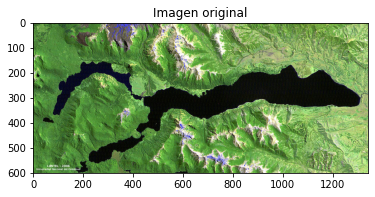

In [92]:
plt.imshow(img)
plt.title("Imagen original")

**Convertir a lista de pixeles**

In [93]:
pixels = img.reshape(img.shape[0]*img.shape[1], 3)

**Datos**

In [94]:
print("--Número de pixels  = ", pixels.shape[0])
print("--Número de colores = ", 2**24)

--Número de pixels  =  805941
--Número de colores =  16777216


**Visualizar pixeles.  obtener un subset aleatorio por cuestiones de performance**

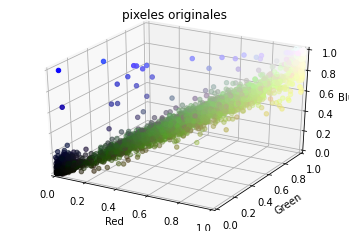

--Número de pixeles usados para plotear y entrenar  =  5000
--Número nuevos colores (K)  =  20


In [95]:
pixels_subset_cant = 5000
pixels_subset = get_random_subset(pixels, pixels_subset_cant)
plot_pixel_list(pixels_subset, pixels_subset, "pixeles originales")
print("--Número de pixeles usados para plotear y entrenar  = ", pixels_subset_cant)
print("--Número nuevos colores (K)  = ", k)

**K-means**

**Aplicar K-means a los píxeles**

In [96]:
modelo = KMeans(n_clusters=k)
modelo.fit(pixels_subset)

KMeans(n_clusters=20)

**Clasificar cada patrón (pixels) con los centroides**

In [97]:
modelo_labels = modelo.predict(pixels_subset)

**Visualizar centros y cuantización**

**Visualizar resultado de K-means**

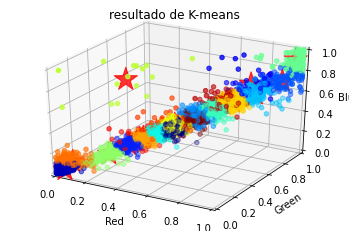

In [98]:
pix_centers = modelo.cluster_centers_
plot_pixel_list(pixels_subset, modelo_labels,
                "resultado de K-means", centers=True, center_data=pix_centers)

**Recolorear la imagen completa**

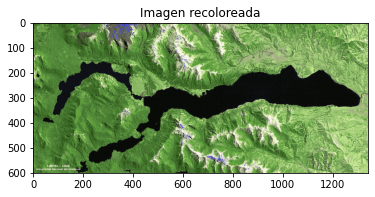

In [99]:
new_colors = modelo.cluster_centers_[modelo.predict(pixels)]
img_recolored = new_colors.reshape(img.shape)
fig = plt.figure()
plt.title("Imagen recoloreada")
plt.imshow(img_recolored)
plt.show()

# **Defino la segunda variable k**

In [100]:
k_1 = 4

**Cargar imagen**

In [101]:
img_1 = io.imread("/content/huechulafquen.jpg")
img_1 = np.array(img_1, dtype=np.float64) / 255

**Convertir a lista de pixeles**

In [102]:
pixels_1 = img_1.reshape(img_1.shape[0]*img_1.shape[1], 3)

**Datos**

In [103]:
print("--Número de pixels  = ", pixels_1.shape[0])
print("--Número de colores = ", 2**24)

--Número de pixels  =  805941
--Número de colores =  16777216


**Visualizar pixeles.  obtener un subset aleatorio por cuestiones de performance**

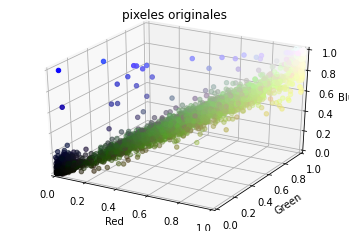

--Número de pixeles usados para plotear y entrenar  =  5000
--Número nuevos colores (K)  =  4


In [104]:
pixels_subset_cant_1 = 5000
pixels_subset_1 = get_random_subset(pixels, pixels_subset_cant_1)
plot_pixel_list(pixels_subset_1, pixels_subset_1, "pixeles originales")
print("--Número de pixeles usados para plotear y entrenar  = ", pixels_subset_cant_1)
print("--Número nuevos colores (K)  = ", k_1)

**K-means**

**Aplicar K-means a los píxeles**

In [105]:
modelo_1 = KMeans(n_clusters=k_1)
modelo_1.fit(pixels_subset_1)

KMeans(n_clusters=4)

**Clasificar cada patrón (pixels) con los centroides**

In [106]:
modelo_labels_1 = modelo_1.predict(pixels_subset_1)

**Visualizar centros y cuantización**

**Visualizar resultado de K-means**

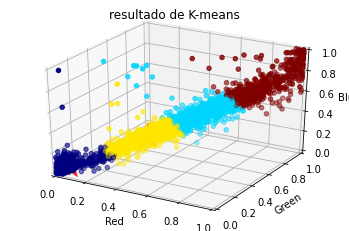

In [107]:
pix_centers_1 = modelo_1.cluster_centers_
plot_pixel_list(pixels_subset_1, modelo_labels_1,
                "resultado de K-means", centers=True, center_data=pix_centers_1)

**Recolorear la imagen completa**

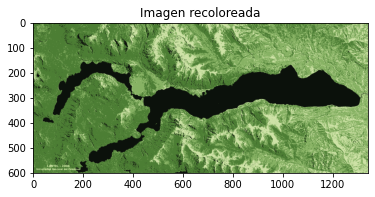

In [108]:
new_colors_1 = modelo_1.cluster_centers_[modelo_1.predict(pixels_1)]
img_recolored_1 = new_colors_1.reshape(img_1.shape)
fig_1 = plt.figure()
plt.title("Imagen recoloreada")
plt.imshow(img_recolored_1)
plt.show()

# **OBSERVACIÓN: A medida que disminuyo el número de clusters (k), se observa que la calidad del modelo empeora notándose en la comparación de la primera imágen recoloreada con la segunda.**

# **Superficie del lago**

Creo el modelo para predecir los píxeles a buscar

In [109]:
modelo_labels = modelo.predict(pixels_subset)
modelo_labels

array([10,  1,  7, ...,  3,  8,  1], dtype=int32)

In [110]:
pixeles_centers = modelo.cluster_centers_
pixeles_centers

array([[0.3793123 , 0.63952259, 0.2344757 ],
       [0.02927792, 0.04171853, 0.0215887 ],
       [0.78621126, 0.79936749, 0.70834915],
       [0.22550933, 0.40714491, 0.14041129],
       [0.89724038, 0.96256354, 0.69019608],
       [0.53068855, 0.65411765, 0.40634747],
       [0.76259804, 0.90230392, 0.55389706],
       [0.32763927, 0.5425659 , 0.23252175],
       [0.57542395, 0.76262586, 0.41917064],
       [0.97091503, 0.96421569, 0.91642157],
       [0.15754746, 0.30173254, 0.07988381],
       [0.28810458, 0.29202614, 0.85594771],
       [0.41664769, 0.59535737, 0.30648956],
       [0.66234554, 0.82051054, 0.48951535],
       [0.27790558, 0.47898638, 0.19189396],
       [0.06358805, 0.07106469, 0.0994869 ],
       [0.45861713, 0.45634675, 0.39334365],
       [0.33482726, 0.34845938, 0.26848739],
       [0.66003422, 0.70311883, 0.530833  ],
       [0.47577483, 0.70364748, 0.32220114]])

In [111]:
cantidad_pixeles = modelo_labels.tolist().count(2)

Cada pixel represente 31x31 metros

In [115]:
print("Superficie aproximada del lago:", cantidad_pixeles*31, "x", cantidad_pixeles*31, "metros cuadrados.")

Superficie aproximada del lago: 1922 x 1922 metros cuadrados.
